# Tustin's approximation, harmonic oscillator

Write the approximation as
$$ F_d(z) = F(s')|_{s'=g\frac{z-1}{z+1}}, \quad g > 0 $$
clearly for the standard Tustin's approximation we have  $g = \frac{2}{h}$.

Apply the approximation to the system
$$F(s) = \frac{\omega_n^2}{s^2 + \omega_n^2} = \frac{\omega_n^2}{(s + i\omega_n)(s -i\omega_n)}$$

**Determine the poles. What is the angle (argument) of the discrete-time poles?**


\begin{align}
F(z) &= \frac{\omega_n^2}{(g\frac{z-1}{z+1})^2 + \omega_n^2}\\
     &= \frac{\omega_n^2}{(g\frac{z-1}{z+1})^2 + \omega_n^2}\\
     &= \frac{\omega_n^2(z+1)^2}{g^2(z^2 -2z + 1) + \omega_n^2(z^2 + 2z + 1)}\\
     &= \frac{\omega_n^2(z+1)^2}{(g^2+\omega_n^2)z^2 + 2(\omega_n^2 -g^2)z + (g^2 + \omega_n^2)}
     &= = \frac{ \frac{\omega_n^2}{g^2 + \omega_n^2}(z+1)^2}{z^2 + 2\frac{\omega_n^2 - g^2}{\omega_n^2 + g^2}z + 1}
\end{align}
The denominator has the form of the characteristic polynomial for two poles on the unit circle. Note that 
$$ (z+\cos\theta + i\sin\theta)(z+\cos\theta -i\sin\theta) = z^2 + 2\cos\theta z + 1. $$
So the two poles of $F(z)$ are on the unit circle with argument given by the solution $\theta$ to 
$$ 2\cos\theta = 2\frac{\omega_n^2 -g^2}{\omega_n^2 + g^2}$$
$$ \cos\theta = \frac{\omega_n^2 -g^2}{\omega_n^2 + g^2} $$

To find the imaginary part of the poles, use $\sin^2\theta = 1 - \cos^2\theta$.
$$ \sin\theta = \sqrt{1 - \cos^2\theta} = \sqrt{1 - \frac{(\omega_n^2 - g^2)^2}{(\omega_n^2 + g^2)^2}}$$

In [2]:
import numpy as np
import sympy as sy
import control.matlab as cm
sy.init_printing() 

In [3]:
s, z = sy.symbols('s,z', real=False)
wn,h,g = sy.symbols('omega_n, h,g', real=True, positive=True)

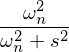

In [4]:
F = wn**2/(s**2 + wn**2)
F

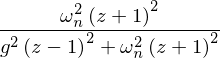

In [8]:
Fd = sy.simplify(F.subs({s:g*(z-1)/(z+1)}))
Fd

In [9]:
(num, den) = sy.fraction(Fd)
den

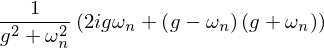

In [18]:
(p1,p2) = sy.solve(den,z)
p2

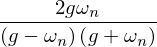

In [19]:
(p2real, p2im) = p2.as_real_imag()
sy.simplify(p2im/p2real)

In [20]:
sy.arg(p2)

In [22]:
sy.simplify(p2real**2 + p2im**2)

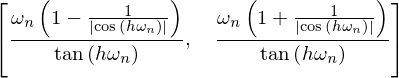

In [30]:
tanwnh = sy.tan(wn*h)
sy.trigsimp(sy.solve(p2im/p2real - tanwnh, g))

Note that 
$$ \tan(\frac{\omega_n h}{2}) = \frac{\sin(\omega_n h)}{1 + \cos(\omega_n h)} $$
and so
$$ \frac{\omega_n (1 + \frac{1}{\cos(\omega_n h)})}{\tan(\omega_n h)} = \frac{\omega_n (1 + \frac{1}{\cos(\omega_n h)})}{\frac{\sin(\omega_n h)}{\cos (\omega_n h)}}
= \frac{\omega_n}{\tan(\omega_n h)} $$